<a href="https://colab.research.google.com/github/shreyakumar05/Salary-Prediction/blob/main/Salaryprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df= pd.read_csv("Salary.csv")

FileNotFoundError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [ ]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [ ]:
df.tail()

,YearsExperience,Salary
30,11.2,127345
31,11.5,126756
32,12.3,128765
33,12.9,135675
34,13.5,139465


In [ ]:
df.sample(10)

,YearsExperience,Salary
20,6.8,91738
28,10.3,122391
14,4.5,61111
10,3.9,63218
21,7.1,98273
8,3.2,64445
9,3.7,57189
12,4.0,56957
3,2.0,43525
25,9.0,105582


In [ ]:
df.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


# Data Cleaning

 1. Checking for duplicates

In [ ]:
df.shape

(35, 2)

In [ ]:
df =df.drop_duplicates()

In [ ]:
df.shape

(35, 2)

2. Removing NULL values

In [ ]:
df.dropna(axis=0,how='any',inplace=True)

3. Creating Independent(x) and Dependent(y) Variables

  Salary - y
  
  years of experience - x

In [ ]:
target_feature = 'Salary'
y = df[target_feature]
x= df.drop(target_feature, axis=1)

# Data visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f845565ad50>]],
      dtype=object)

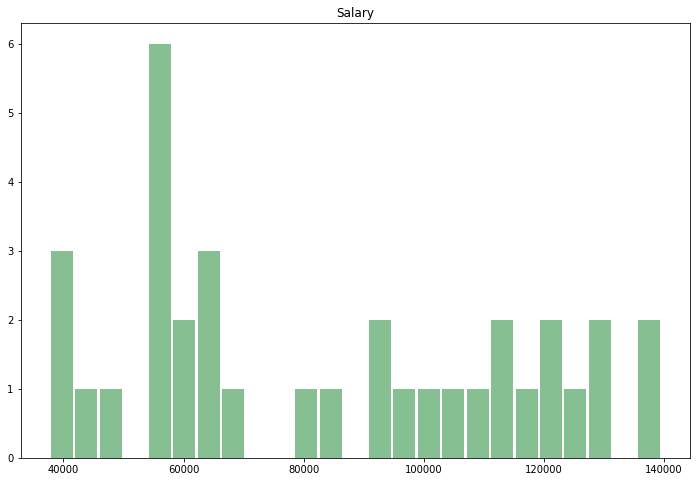

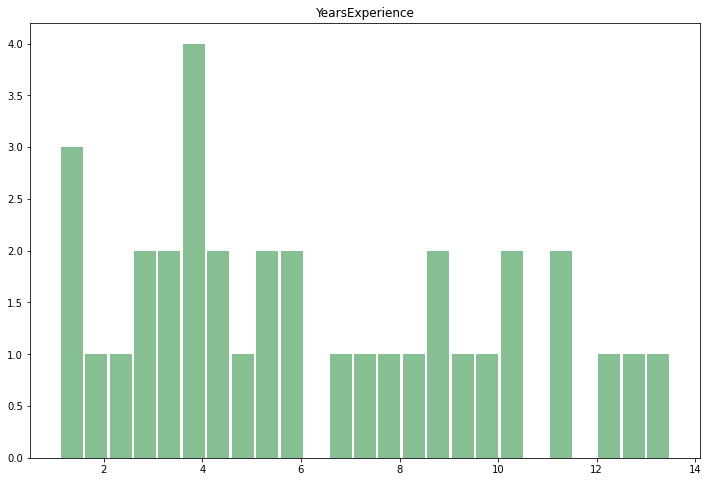

In [ ]:
df.hist(column='Salary', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)
df.hist(column='YearsExperience', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

(array([[0.00017926, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.00017926, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.00017926, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.00017926, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.00017926, 0.        , 0.        , ..., 0.        , 0.00017926,
         0.        ],
        [0.00017926, 0.        , 0.        , ..., 0.        , 0.        ,
         0.00017926]]),
 array([1.10000000e+00, 2.79037800e+03, 5.57965600e+03, 8.36893400e+03,
        1.11582120e+04, 1.39474900e+04, 1.67367680e+04, 1.95260460e+04,
        2.23153240e+04, 2.51046020e+04, 2.78938800e+04, 3.06831580e+04,
        3.34724360e+04, 3.62617140e+04, 3.90509920e+04, 4.18402700e+04,
        4.46295480e+04, 4.74188260e+04, 5.02081040e+04, 5.29973820e+04,
        5.57866600e+04, 5.85759380e+04, 6.1365216

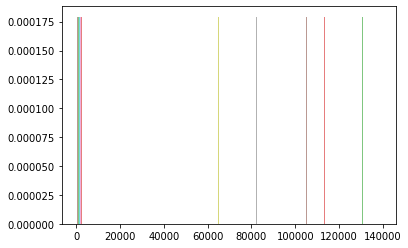

In [ ]:
plt.hist(df, bins=50, density=True, alpha=0.6)

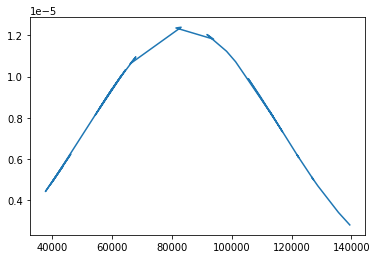

In [ ]:
import statistics
from scipy.stats import norm

x_axis = df['Salary']

mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)
    
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.show()

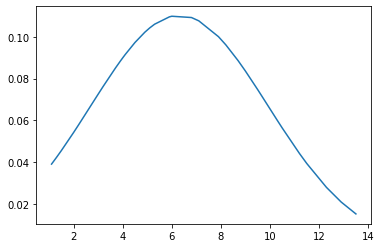

In [ ]:
y_axis = df['YearsExperience']

mean = statistics.mean(y_axis)
sd = statistics.stdev(y_axis)
    
plt.plot(y_axis, norm.pdf(y_axis, mean, sd))
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


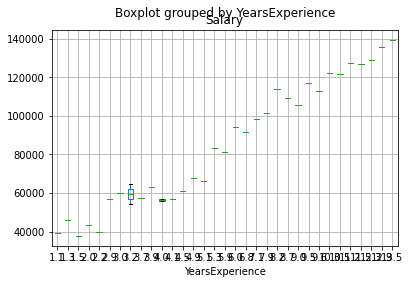

In [ ]:
df.boxplot('Salary','YearsExperience')

Text(0, 0.5, 'Salary according to job experience')

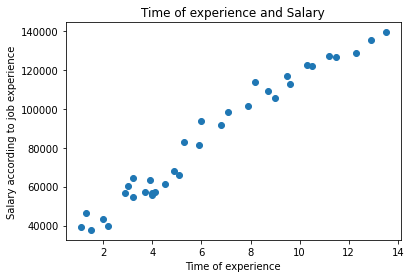

In [ ]:
plt.scatter(x,y)
plt.title('Time of experience VS Salary')
plt.xlabel('Time of experience')
plt.ylabel('Salary according to job experience')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

Applying Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regr = LinearRegression()

In [ ]:
regr.fit(x_train,y_train)

LinearRegression()

Get the parameters

In [ ]:
regr.intercept_

29445.056520181286

In [ ]:
regr.coef_

array([8629.79240044])

Apply model to test data

In [ ]:
y_pred = regr.predict(x_test)
y_pred

array([120057.87672477,  88127.64484315,  73456.99776241, 118331.91824468,
        97620.41648363,  71731.03928232,  63101.24688189])

In [ ]:
y_pred.shape

(7,)

Comparing the predicted and actual values

In [ ]:
df1 = pd.DataFrame({'Actual' : y_test, 'Predicted' : y_pred, 'Variance' : y_test - y_pred})

In [ ]:
df1

,Actual,Predicted,Variance
29,121872,120057.876725,1814.123275
20,91738,88127.644843,3610.355157
16,66029,73456.997762,-7427.997762
28,122391,118331.918245,4059.081755
22,101302,97620.416484,3681.583516
15,67938,71731.039282,-3793.039282
10,63218,63101.246882,116.753118


Visualising our model

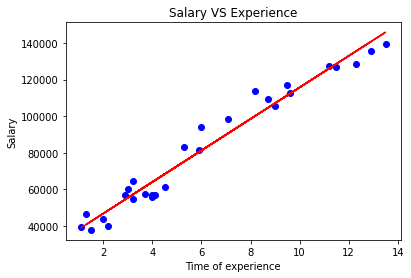

In [ ]:
plt.scatter(x_train,y_train, color='blue')
plt.plot(x_train, regr.predict(x_train), color='red')
plt.xlabel('Time of experience')
plt.ylabel('Salary')
plt.title('Salary VS Experience')
plt.show()

Visualize the test data

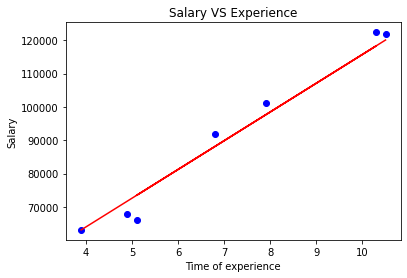

In [ ]:
plt.scatter(x_test,y_test, color='blue')
plt.plot(x_test, regr.predict(x_test), color='red')
plt.xlabel('Time of experience')
plt.ylabel('Salary')
plt.title('Salary VS Experience')
plt.show()

Evaluation of metrics of regression algorithms

In [ ]:
from sklearn.metrics import r2_score
score = r2_score(y_test,y_pred) * 100
print('Score :', score)

Score : 97.08090245443415


In [ ]:
from sklearn import metrics
print('Mean absolute error :', metrics.mean_absolute_error(y_test,y_pred) )
print('Mean squared error :', metrics.mean_squared_error(y_test,y_pred) )
print('Root Mean squared error :', np.sqrt(metrics.mean_squared_error(y_test,y_pred) ))

Mean absolute error : 3500.419123800644
Mean squared error : 16561691.220974546
Root Mean squared error : 4069.605782010654
